# I-94 Interstate - Highway Traffic Volume Analysis

The goal of our analysis is to identify the various causes of Westbound traffic on the I-94 interstate highway. We will be identifying various indicators of traffic such as Time(Day of the week, Hour, Month), Weather and various other factors.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [5]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


###### The dataset has 48,204 rows and 9 columns, and there are no null values. Each row describes traffic and weather data for a specific hour — we have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.

A station located approximately midway between Minneapolis and Saint Paul records the traffic data (see the dataset documentation). For this station, the direction of the route is westbound (i.e., cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of the station. In other words, we should avoid generalizing our results for the entire I-94 highway.

## Analysing traffic volume

We will start by analysing the traffic_volume column.

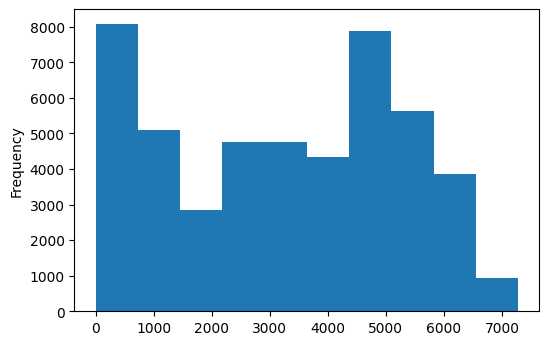

In [6]:
trafficvolume = traffic['traffic_volume']
trafficvolume.plot.hist()
plt.show()

In [7]:
trafficvolume.describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
About 75% of the time, the traffic volume was four times as much (4,933 cars or more).

## Traffic volume - Day vs. Night

We will start by dividing the dataset according to Day and Night time.
- Day : 7 AM - 7 PM
-  Night : 7 PM - 7 AM

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [8]:
traffic['date_time'].head()

0    2012-10-02 09:00:00
1    2012-10-02 10:00:00
2    2012-10-02 11:00:00
3    2012-10-02 12:00:00
4    2012-10-02 13:00:00
Name: date_time, dtype: object

In [9]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic['date_time'].head()
traffic['date_time'].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

In [10]:
day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(day.shape)

night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


## Traffic volume - Day vs. Night (2)

Now that we've isolated day and night, we're going to look at the histograms of traffic volume side-by-side by using a grid chart.

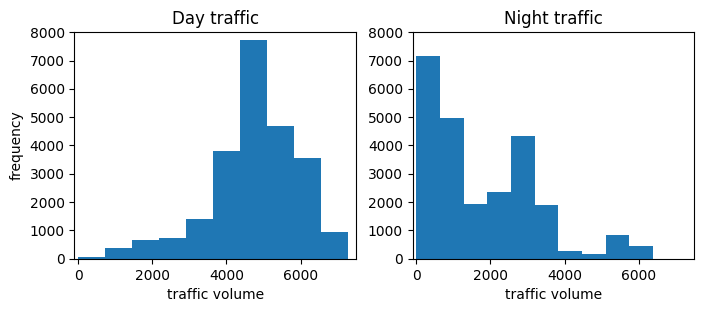

In [11]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.ylim(0,8000)
plt.xlim(-100,7500)
plt.title('Day traffic')
plt.xlabel('traffic volume')
plt.ylabel('frequency')

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.ylim(0,8000)
plt.xlim(-100,7500)
plt.title('Night traffic')
plt.xlabel('traffic volume')

plt.show()

In [12]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

## Time Indicators


One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of day.

We're going to look at a few line plots showing how the traffic volume changes according to the following:

- Month
- Day of the week
- Time of day

In [14]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
#creating month column to be able to sort out data acc. to month. 
#Using df.groupby().mean() to group dataset by month column with mean as aggregate functiion

In [15]:
by_month

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
month,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727
2,266.663789,0.004019,0.000000,51.550459,4711.198394
3,273.619940,0.015839,0.000000,56.827811,4889.409560
4,279.661071,0.105343,0.000000,59.221525,4906.894305
5,289.282668,0.130863,0.000000,56.548825,4911.121609
6,294.576068,0.271121,0.000000,48.612374,4898.019566
7,296.785052,4.412258,0.000000,42.176619,4595.035744
8,295.119191,0.228113,0.000000,42.556892,4928.302035
9,292.520287,0.289807,0.000000,45.184112,4870.783145


In [16]:
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

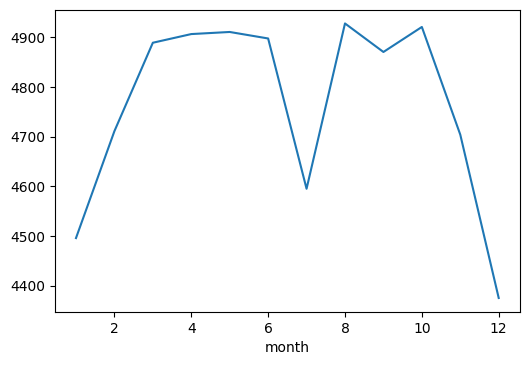

In [17]:
by_month['traffic_volume'].plot.line()
plt.show()


Peak traffic seems to be during Months 3-6 and 8-10 mid. Least traffic during months 1-2 and 6-8. 
The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?



# Time indicators 2

In [18]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

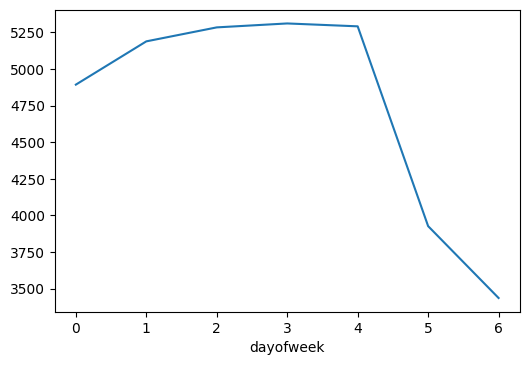

In [19]:
by_dayofweek['traffic_volume'].plot.line()
plt.show()

Peak traffic stays from Tuesday to Friday and gets lesser with onset of weekend. Clear difference in traffic between weekdays and weekends. Now lets seperate data based on hour of weekday and weekend.

In [20]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4] #4 is friday
weekend = day.copy()[day['dayofweek'] >= 5]
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

by_hour_business.head()


,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek
hour,,,,,,,
7,278.662639,0.145105,0.000068,50.538983,6030.413559,6.363390,1.984407
8,278.938443,0.144614,0.000135,53.666441,5503.497970,6.567659,1.989175
9,279.628421,0.156829,0.000139,53.619709,4895.269257,6.484386,1.981263
10,280.664650,0.113984,0.000033,54.781417,4378.419118,6.481283,1.957888
11,281.850231,0.151976,0.000000,52.808876,4633.419470,6.448819,1.979957


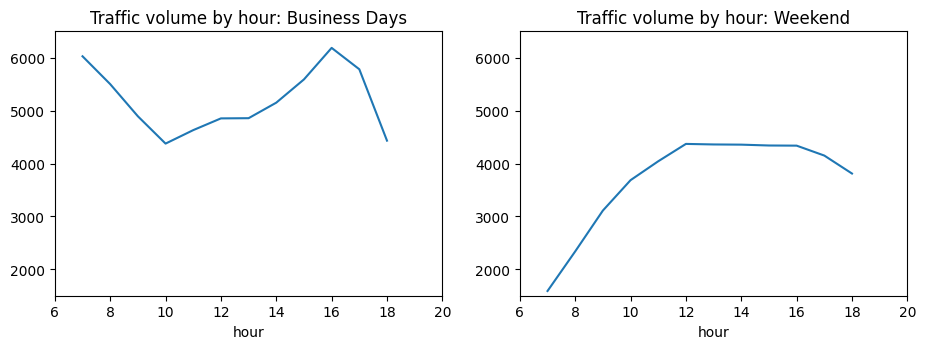

In [21]:
plt.figure(figsize = (11,3.5))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic volume by hour: Business Days')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic volume by hour: Weekend')
plt.show()

Traffic volume on business days is on its peak at 7am and 4pm, with much lesser traffic volumes at 8am-1pm. It return to its peak from 2-4pm and it returning to normal levels thereafter.

Traffic volumes on the Weekend is drastically lesser compared to Business days, as peak traffic volumes are the same as normal traffic volumes on business days. The peak traffic is from 12pm to 4pm, the volume being almost the same as it is during Off-Peak hours on business days.

### So far, we've focused on finding time indicators for heavy traffic, and we reached the following conclusions:

The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
The traffic is usually heavier on business days compared to weekends.
On business days, the rush hours are around 7 and 16.

## Weather Indicators

In [22]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature has the strongest correlation with Traffic_volume at +0.13. Other relevant columns (rain_1h, snow_1h and clouds_all) dont have strong correlation with traffic volume. Now lets make a scatter plot for temp and traffic volume.

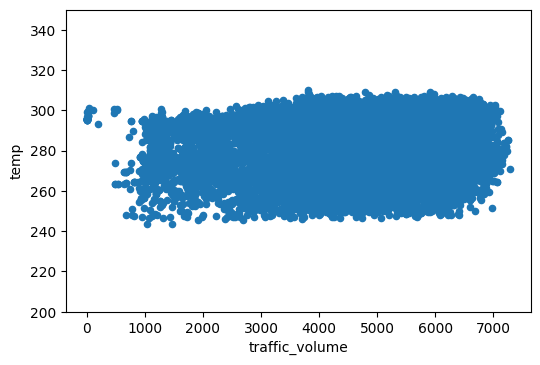

In [23]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(200,350)  #2 error values mess up the plot
plt.show()

Temp does not seem like a reliable indicator.

In [24]:
by_weather_main= day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

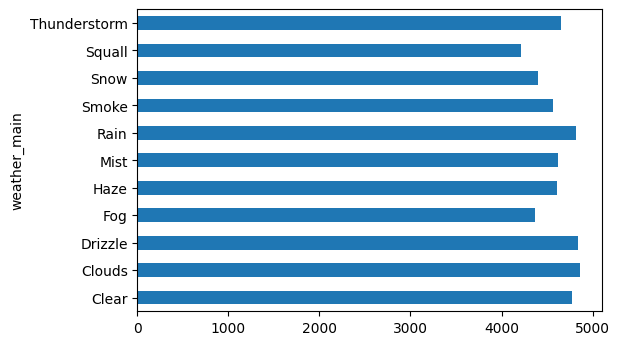

In [25]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

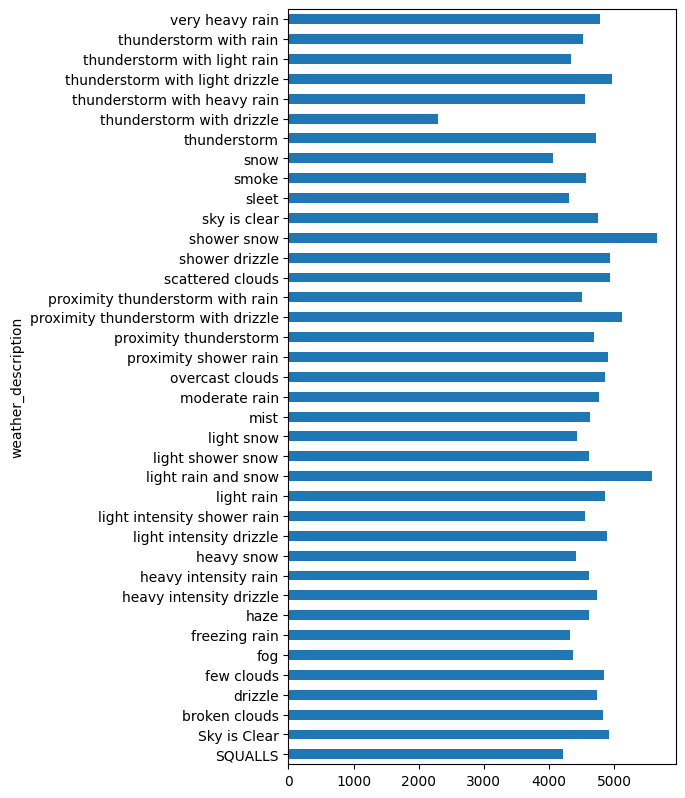

In [26]:
by_weather_description['traffic_volume'].plot.barh(figsize= (5,10))
plt.show()

Snow shower and Light rain & snow have traffic volumes exceeding 5000. These weather conditions can be deemed as heavy traffic indicators. It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

# Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

#### Time indicators
-The traffic is usually heavier during warm months (March–October) compared to   cold months (November–February).
-The traffic is usually heavier on business days compared to the weekends.
-On business days, the rush hours are around 7 and 16.

#### Weather indicators
Shower snow
Light rain and snow
Proximity thunderstorm with drizzle